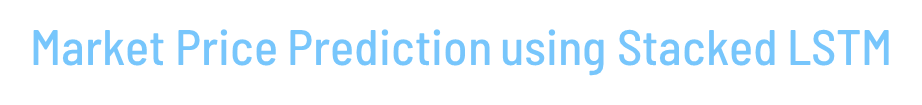

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout



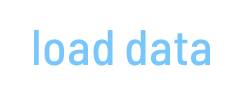

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Market Price Prediction/MarketPricePrediction.csv')



In [ ]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [ ]:
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


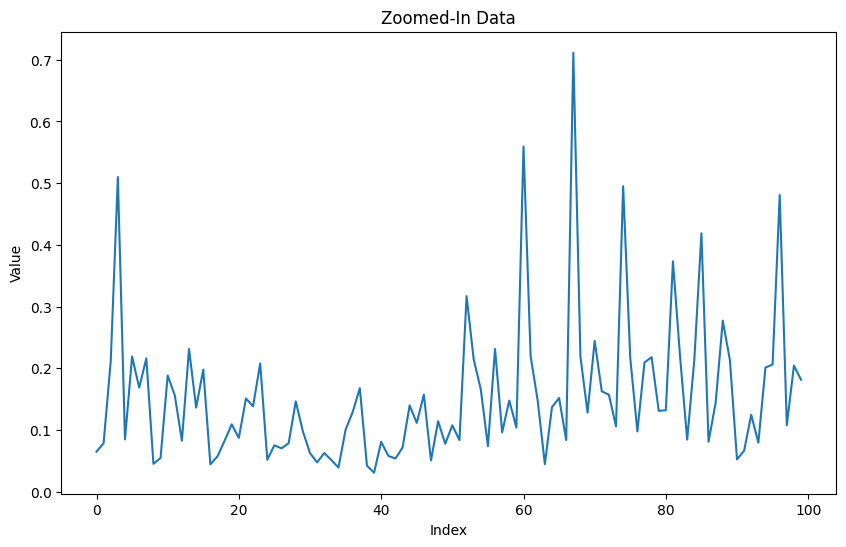

In [ ]:
import matplotlib.pyplot as plt
# Define the range to zoom in
start_index = 0
end_index = 100  # Adjust as needed

# Slice the DataFrame
df1_zoomed = df1[start_index:end_index]

# Plot the zoomed-in data
plt.figure(figsize=(10, 6))
plt.plot(df1_zoomed)
plt.title('Zoomed-In Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

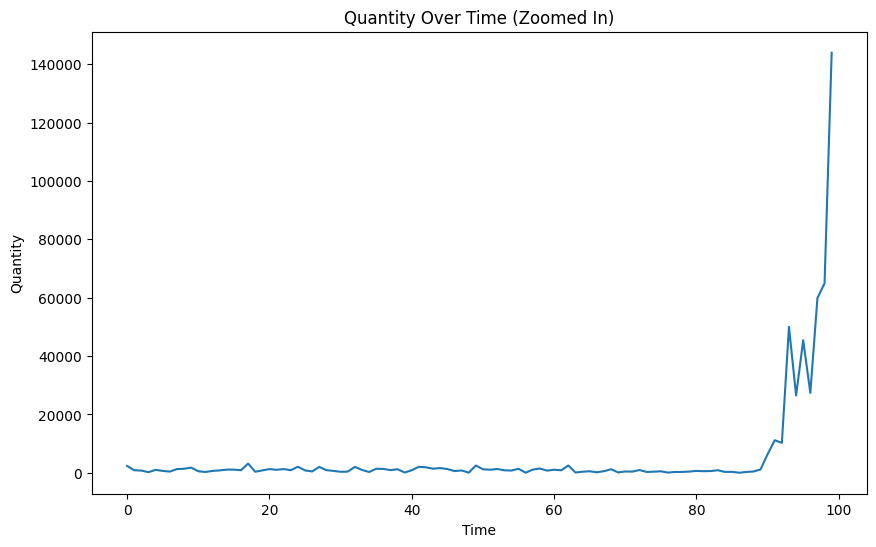

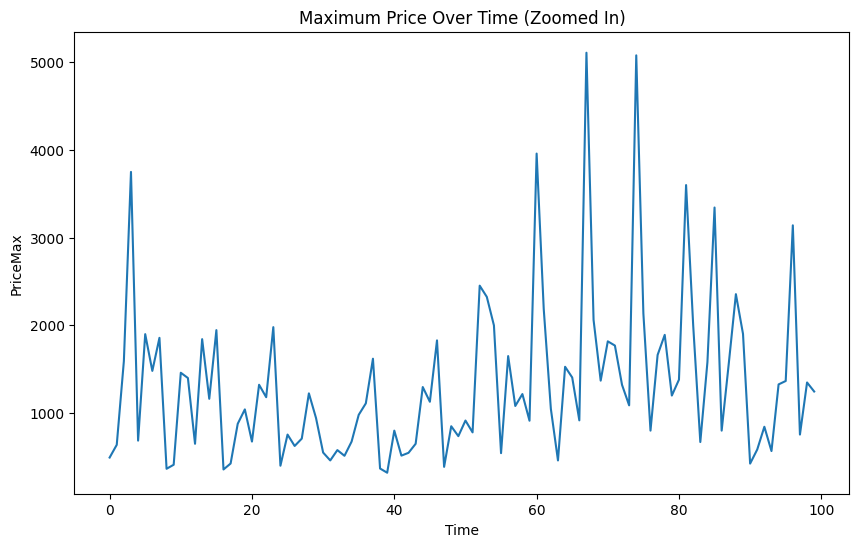

In [ ]:
import matplotlib.pyplot as plt

# Check if 'quantity' column exists and plot zoomed-in data
if 'quantity' in data.columns:
    # Slice the data for zoomed-in plot
    quantity_zoomed = data['quantity'][start_index:end_index]

    # Plot the 'quantity' column zoomed-in
    plt.figure(figsize=(10, 6))
    plt.plot(quantity_zoomed)
    plt.title('Quantity Over Time (Zoomed In)')
    plt.xlabel('Time')
    plt.ylabel('Quantity')
    plt.show()
else:
    print("Column 'quantity' does not exist in the dataset")

# Check if 'priceMax' column exists and plot zoomed-in data
if 'priceMax' in data.columns:
    # Slice the data for zoomed-in plot
    priceMax_zoomed = data['priceMax'][start_index:end_index]

    # Plot the 'priceMax' column zoomed-in
    plt.figure(figsize=(10, 6))
    plt.plot(priceMax_zoomed)
    plt.title('Maximum Price Over Time (Zoomed In)')
    plt.xlabel('Time')
    plt.ylabel('PriceMax')
    plt.show()
else:
    print("Column 'priceMax' does not exist in the dataset")



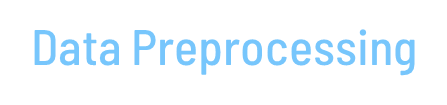

# Handle Missing Values:

In [ ]:
# Check for null/zero values
print(data.isnull().sum())

# Fill or drop missing values as appropriate
data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

# Verify no missing values remain
print(data.isnull().sum())

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64
market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64


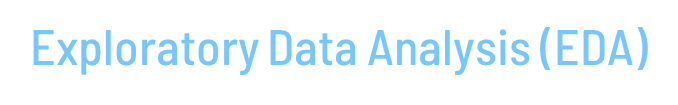

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['market'] = label_encoder.fit_transform(data['market'])
data['state'] = label_encoder.fit_transform(data['state'])
data['city'] = label_encoder.fit_transform(data['city'])


In [ ]:

# Select features to scale
features = ['quantity', 'priceMin', 'priceMax', 'priceMod', 'market', 'state', 'city']

# Initialize scaler
scaler = MinMaxScaler()

# Scale the features
scaled_data = scaler.fit_transform(data[features])

# Convert scaled data back to DataFrame for easier handling
scaled_data = pd.DataFrame(scaled_data, columns=features)


### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.06483957],
       [0.07870989],
       [0.21173128],
       ...,
       [0.07620321],
       [0.07185829],
       [0.09909759]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(6647, 3580)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0]) ### 101
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(6546, 100)
(6546,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(3479, 100)
(3479,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

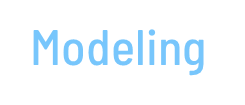Stacked LSTM model

In [ ]:
!pip install tensorflow


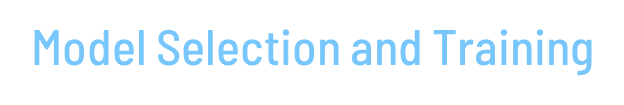

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
103/103 [==============================] - 32s 249ms/step - loss: 0.0102 - val_loss: 0.0080
Epoch 2/100
103/103 [==============================] - 24s 235ms/step - loss: 0.0102 - val_loss: 0.0078
Epoch 3/100
103/103 [==============================] - 22s 214ms/step - loss: 0.0096 - val_loss: 0.0076
Epoch 4/100
103/103 [==============================] - 24s 235ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 5/100
103/103 [==============================] - 22s 214ms/step - loss: 0.0095 - val_loss: 0.0076
Epoch 6/100
103/103 [==============================] - 24s 235ms/step - loss: 0.0090 - val_loss: 0.0070
Epoch 7/100
103/103 [==============================] - 22s 217ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 8/100
103/103 [==============================] - 24s 234ms/step - loss: 0.0083 - val_loss: 0.0070
Epoch 9/100
103/103 [==============================] - 22s 215ms/step - loss: 0.0082 - val_loss: 0.0071
Epoch 10/100
103/103 [==============================] - 24s 232m

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

109/109 [==============================] - 6s 56ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

948.9195940173497

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

818.4357401520092

# Visualizations:

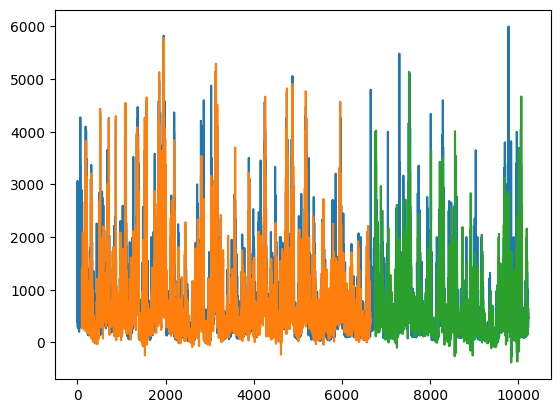

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

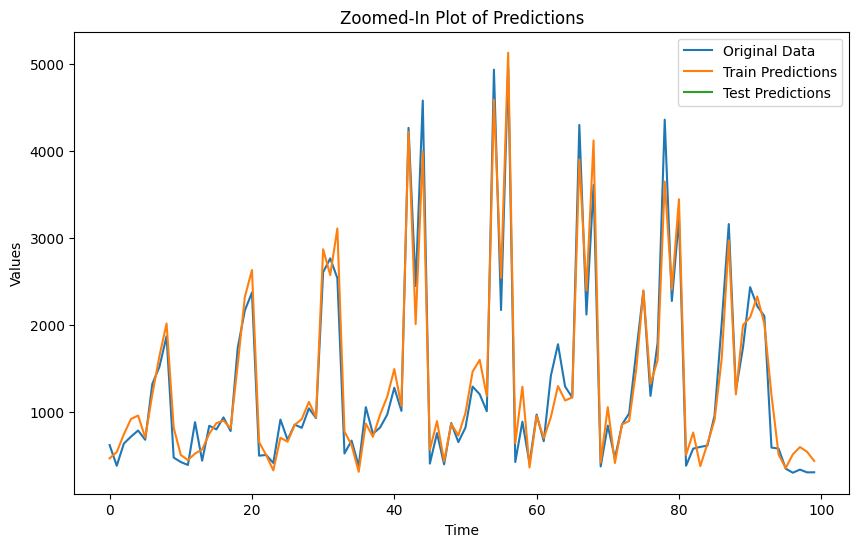

In [ ]:
### Plotting
# shift train predictions for plotting
# Define the range to zoom in
start_index = 1800
end_index = 1900  # Adjust as needed

# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions (zoomed-in)
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1)[start_index:end_index], label='Original Data')
plt.plot(trainPredictPlot[start_index:end_index], label='Train Predictions')
plt.plot(testPredictPlot[start_index:end_index], label='Test Predictions')
plt.title('Zoomed-In Plot of Predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

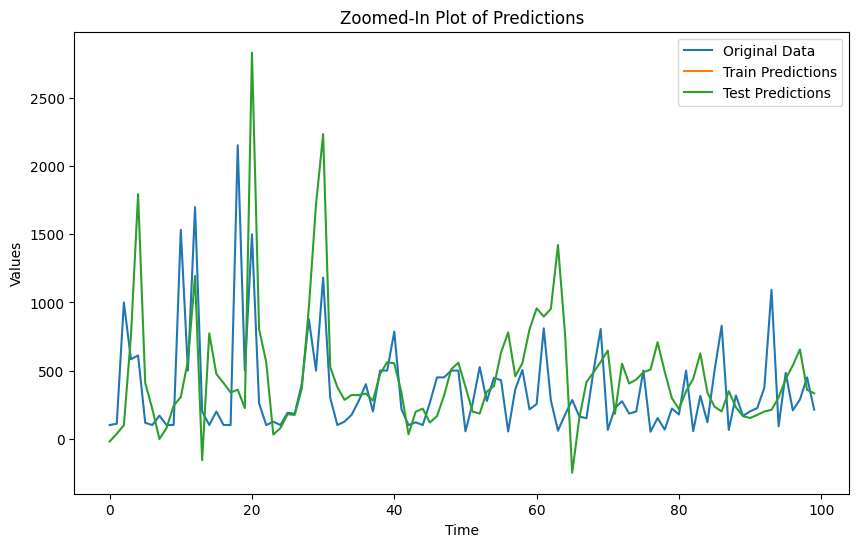

In [ ]:
### Plotting
# shift train predictions for plotting
# Define the range to zoom in
start_index = 8900
end_index = 9000  # Adjust as needed

# Shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions (zoomed-in)
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1)[start_index:end_index], label='Original Data')
plt.plot(trainPredictPlot[start_index:end_index], label='Train Predictions')
plt.plot(testPredictPlot[start_index:end_index], label='Test Predictions')
plt.title('Zoomed-In Plot of Predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

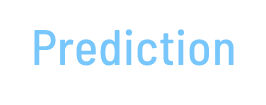

In [ ]:

len(test_data)

3580

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 3239)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=3238
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.01587567 0.03843583 0.0434492  ... 0.07620321 0.07185829 0.09909759]
0 day output [[0.10400571]]
1 day input [0.03843583 0.0434492  0.04060829 ... 0.07185829 0.09909759 0.10400571]
1 day output [[0.1290316]]
2 day input [0.0434492  0.04060829 0.01821524 ... 0.09909759 0.10400571 0.1290316 ]
2 day output [[0.16432963]]
3 day input [0.04060829 0.01821524 0.07018717 ... 0.10400571 0.1290316  0.16432963]
3 day output [[0.20630403]]
4 day input [0.01821524 0.07018717 0.01938503 ... 0.1290316  0.16432963 0.20630403]
4 day output [[0.24951059]]
5 day input [0.07018717 0.01938503 0.03375668 ... 0.16432963 0.20630403 0.24951059]
5 day output [[0.2808556]]
6 day input [0.01938503 0.03375668 0.02606952 ... 0.20630403 0.24951059 0.2808556 ]
6 day output [[0.2949091]]
7 day input [0.03375668 0.02606952 0.01537433 ... 0.24951059 0.2808556  0.29490909]
7 day output [[0.28393462]]
8 day input [0.02606952 0.01537433 0.01604278 ... 0.2808556  0.29490909 0.28393462]
8 day output [[0.240749

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

10227

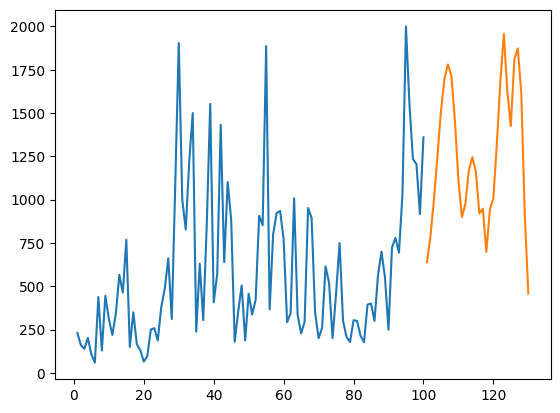

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:1258]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

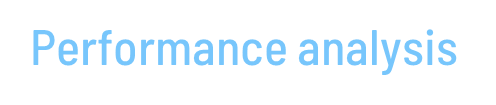

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

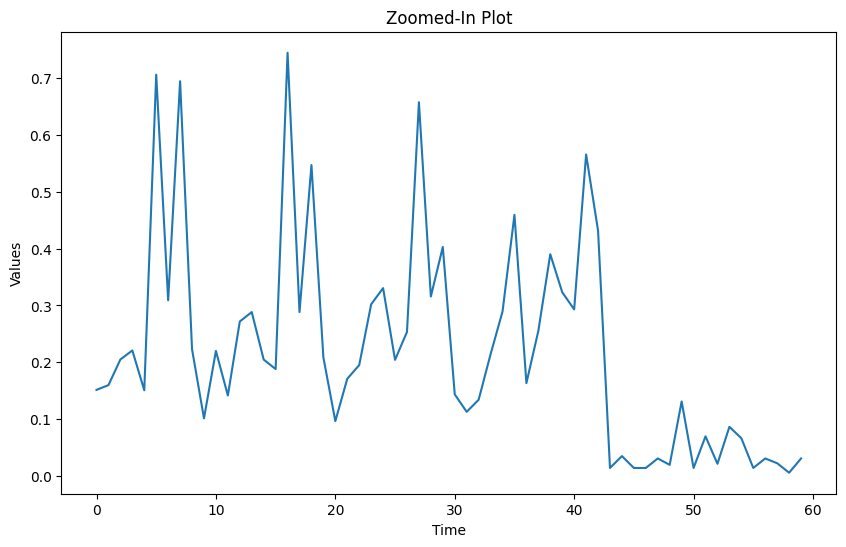

In [ ]:
# Concatenate df1 and lst_output
df3 = df1.tolist()
df3.extend(lst_output)

# Define the range to zoom in more
start_index = 1350
end_index = 1410  # Adjust as needed

# Plot the zoomed-in section
plt.figure(figsize=(10, 6))
plt.plot(df3[start_index:end_index])
plt.title('Zoomed-In Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

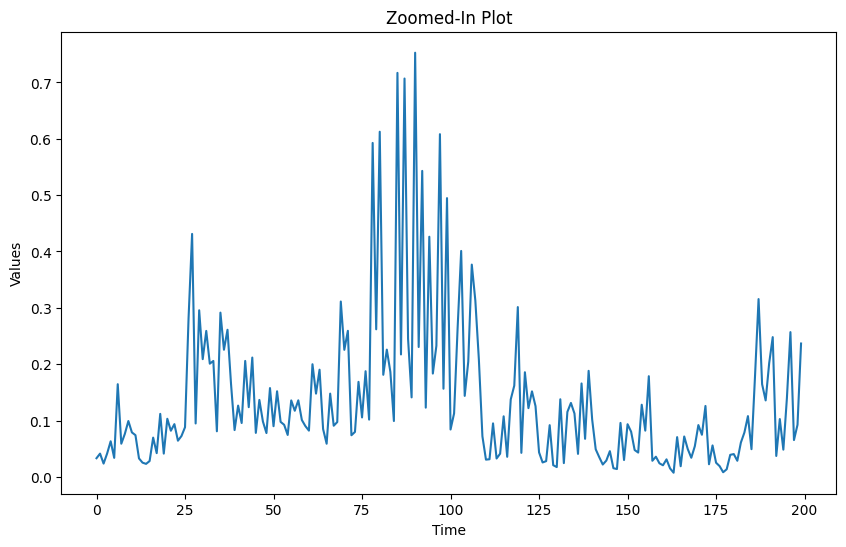

In [ ]:
# Define the range to zoom in more
start_index = 1000
end_index = 1200  # Adjust as needed

# Plot the zoomed-in section
plt.figure(figsize=(10, 6))
plt.plot(df3[start_index:end_index])
plt.title('Zoomed-In Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()